In [47]:
import pandas as pd 

caminho = 'C:/Users/gaboh/Documents/GitHub/Mini-Curso-Automação-Processos-Python/base_dados.xlsx'



In [48]:
produtos = pd.read_excel(caminho, sheet_name='Produtos')
emails = pd.read_excel(caminho, sheet_name='E-mails')
vendas = pd.read_excel(caminho, sheet_name='Vendas')

In [49]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Data        1048572 non-null  object
 1   Loja        1048573 non-null  object
 2   Produto     1048562 non-null  object
 3   Quantidade  1048575 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [50]:

vendas['Data'] = pd.to_datetime(vendas['Data'],
                                format='%Y-%m-%d %H:%M:%S',
                                errors='coerce')
vendas = vendas.dropna() # otro metodo para tratamiento de datos fillna()
vendas

,Data,Loja,Produto,Quantidade
0,2017-05-27,Avenida 44,Short,2
1,2019-11-04,Avenida 44,Relógio,5
2,2019-06-18,Shopping Flamboyant,Calça,2
3,2020-04-18,Shopping Bougainville,Meia,1
4,2018-06-12,Avenida 85,Camisa,2
...,...,...,...,...
1048570,2010-05-29,Avenida 44,Chinelo,6
1048571,2015-02-18,Avenida 85,Calcinha,6
1048572,2014-01-05,Avenida 44,Camiseta,2
1048573,2019-08-02,Avenida Anhanguera,Meia,4


In [51]:
# se crea una columna automaticamente de lucro siendo el valor unitario menos el costo unitario 
produtos['Lucro'] = produtos['Valor Unitário (US$)'] - \
    produtos['Custo Unitário (US$)']
produtos

,Produto,Valor Unitário (US$),Custo Unitário (US$),Lucro
0,Short,12,3.26,8.74
1,Relógio,45,11.99,33.01
2,Calça,30,7.46,22.54
3,Meia,5,1.53,3.47
4,Camisa,25,8.78,16.22
5,Tênis,35,9.89,25.11
6,Chinelo,8,2.58,5.42
7,Camiseta,30,7.27,22.73
8,Sapato,40,18.39,21.61
9,Bermuda,15,3.91,11.09


In [52]:
#juntado las tablas de ventas y produtos... segun el nombre de Produto
venda = vendas.merge(produtos, how='outer', on='Produto')
#cambair el nombre de las etiquetas 
venda = venda.rename(columns={'Valor Unitário (US$)': 'Valor',
                              'Custo Unitário (US$)': 'Custo'})
#creando nuevas columnas con con nuevas cantidades 
venda['Valor'] = venda['Valor'] * venda['Quantidade']
venda['Custo'] = venda['Custo'] * venda['Quantidade']
venda['Lucro'] = venda['Lucro'] * venda['Quantidade']
venda

,Data,Loja,Produto,Quantidade,Valor,Custo,Lucro
0,2017-05-27,Avenida 44,Short,2,24,6.52,17.48
1,2015-06-07,Avenida Anhanguera,Short,1,12,3.26,8.74
2,2018-03-23,Shopping Passeio das Águas,Short,5,60,16.30,43.70
3,2016-03-18,Avenida 44,Short,2,24,6.52,17.48
4,2013-09-02,Avenida 44,Short,5,60,16.30,43.70
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,15,5.07,9.93
1048509,2017-07-16,Goiânia Shopping,Cueca,1,5,1.69,3.31
1048510,2017-10-26,Avenida 44,Cueca,5,25,8.45,16.55
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,20,6.76,13.24


### Web Scrapping 

In [80]:
#...................... codigo para collab google ..............................#

# a traves de la clases en formato HTML, se usa la biblioteca en python y buscas los datos para obtener los valores actuales que se pretende obtener 

#url = 'https://br.investing.com/currencies/usd-brl'
#pagina = requests.get(url)
#pagina.content
#parseamento para obtener los datos de la pagina 
#sopa = BeautifulSoup(pagina.content, 'html.parser')
# se quiere obtener el valor ubicado en <span class="text-2xl" data-test="instrument-price-last">5,2023</span> en la pagina web 
#resposta = sopa.find('span', class_='text-2xl')
#dolar = resposta.getText() # .attrs
#dolar = dolar.replace(',', '.')
#dolar = float(dolar)
#dolar

In [74]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://br.investing.com/currencies/usd-brl')
soup = BeautifulSoup(driver.page_source,'html.parser')

resposta = soup.find('span', class_='text-2xl')
dolar = resposta.getText() # .attrs

driver.close()


C:\Users\gaboh\AppData\Local\Temp\ipykernel_37000\1397748159.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [78]:
dolar = resposta.getText() # .attrs
dolar = dolar.replace(',', '.')
dolar = float(dolar)
print(dolar)

5.2023


In [79]:
# dos corchetes para acceder a dos o mas columnas
venda[['Valor', 'Custo', 'Lucro']] = \
    venda[['Valor', 'Custo', 'Lucro']] * dolar
venda

,Data,Loja,Produto,Quantidade,Valor,Custo,Lucro
0,2017-05-27,Avenida 44,Short,2,124.8552,33.918996,90.936204
1,2015-06-07,Avenida Anhanguera,Short,1,62.4276,16.959498,45.468102
2,2018-03-23,Shopping Passeio das Águas,Short,5,312.1380,84.797490,227.340510
3,2016-03-18,Avenida 44,Short,2,124.8552,33.918996,90.936204
4,2013-09-02,Avenida 44,Short,5,312.1380,84.797490,227.340510
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,78.0345,26.375661,51.658839
1048509,2017-07-16,Goiânia Shopping,Cueca,1,26.0115,8.791887,17.219613
1048510,2017-10-26,Avenida 44,Cueca,5,130.0575,43.959435,86.098065
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,104.0460,35.167548,68.878452


In [86]:
pd.options.display.float_format = '$ {:,.2f}'.format
vendas_por_loja = venda.groupby('Loja').sum()
vendas_por_loja

,Quantidade,Valor,Custo,Lucro
Loja,,,,
Avenida 44,684989,"$ 82,253,851.43","$ 24,280,776.62","$ 57,973,074.80"
Avenida 85,237822,"$ 26,684,833.69","$ 8,027,024.46","$ 18,657,809.23"
Avenida Anhanguera,413549,"$ 48,624,764.00","$ 14,612,124.88","$ 34,012,639.12"
Goiânia Shopping,463001,"$ 49,944,998.49","$ 15,150,569.69","$ 34,794,428.80"
Shopping Bougainville,146685,"$ 16,255,382.30","$ 4,889,288.95","$ 11,366,093.35"
Shopping Flamboyant,576562,"$ 67,649,356.60","$ 20,752,285.28","$ 46,897,071.32"
Shopping Passeio das Águas,484902,"$ 53,204,712.85","$ 16,191,982.08","$ 37,012,730.77"


In [87]:
vendas_por_loja['Ticket Médio'] = vendas_por_loja['Lucro'] / vendas_por_loja['Quantidade']
vendas_por_loja

,Quantidade,Valor,Custo,Lucro,Ticket Médio
Loja,,,,,
Avenida 44,684989,"$ 82,253,851.43","$ 24,280,776.62","$ 57,973,074.80",$ 84.63
Avenida 85,237822,"$ 26,684,833.69","$ 8,027,024.46","$ 18,657,809.23",$ 78.45
Avenida Anhanguera,413549,"$ 48,624,764.00","$ 14,612,124.88","$ 34,012,639.12",$ 82.25
Goiânia Shopping,463001,"$ 49,944,998.49","$ 15,150,569.69","$ 34,794,428.80",$ 75.15
Shopping Bougainville,146685,"$ 16,255,382.30","$ 4,889,288.95","$ 11,366,093.35",$ 77.49
Shopping Flamboyant,576562,"$ 67,649,356.60","$ 20,752,285.28","$ 46,897,071.32",$ 81.34
Shopping Passeio das Águas,484902,"$ 53,204,712.85","$ 16,191,982.08","$ 37,012,730.77",$ 76.33


In [88]:
#lista para gurdar los productos mas vendidos 
lista_produtos_1 = []
lista_produtos_2 = []
lista_produtos_3 = []
#recorrer cada una de las tiendas 
# se crean 3 columnas extra indicando los 3 productos mas vendidos 
for loja in vendas_por_loja.index:
    df_loja = venda.loc[venda['Loja']==loja] # filtrando las tiendas 
    df_produto = df_loja.groupby('Produto').sum() #sumando los valores de los productos de la tienda en especifico
    df_produto = df_produto.sort_values('Quantidade', ascending=False) #ordendo del mayor a menor producto 
    lista_produtos_1.append(df_produto.index[0]) #anhade 
    lista_produtos_2.append(df_produto.index[1])
    lista_produtos_3.append(df_produto.index[2])
vendas_por_loja['1° Produto Mais Vendido'] = lista_produtos_1
vendas_por_loja['2° Produto Mais Vendido'] = lista_produtos_2
vendas_por_loja['3° Produto Mais Vendido'] = lista_produtos_3
vendas_por_loja

,Quantidade,Valor,Custo,Lucro,Ticket Médio,1° Produto Mais Vendido,2° Produto Mais Vendido,3° Produto Mais Vendido
Loja,,,,,,,,
Avenida 44,684989,"$ 82,253,851.43","$ 24,280,776.62","$ 57,973,074.80",$ 84.63,Camiseta,Camisa,Calça
Avenida 85,237822,"$ 26,684,833.69","$ 8,027,024.46","$ 18,657,809.23",$ 78.45,Camisa,Calcinha,Camiseta
Avenida Anhanguera,413549,"$ 48,624,764.00","$ 14,612,124.88","$ 34,012,639.12",$ 82.25,Camisa,Tênis,Calcinha
Goiânia Shopping,463001,"$ 49,944,998.49","$ 15,150,569.69","$ 34,794,428.80",$ 75.15,Camisa,Calcinha,Camiseta
Shopping Bougainville,146685,"$ 16,255,382.30","$ 4,889,288.95","$ 11,366,093.35",$ 77.49,Camisa,Camiseta,Calcinha
Shopping Flamboyant,576562,"$ 67,649,356.60","$ 20,752,285.28","$ 46,897,071.32",$ 81.34,Camisa,Calça,Calcinha
Shopping Passeio das Águas,484902,"$ 53,204,712.85","$ 16,191,982.08","$ 37,012,730.77",$ 76.33,Camisa,Calcinha,Camiseta


## Graficos

C:\Users\gaboh\AppData\Local\Temp\ipykernel_37000\4122342253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loja['Ano'] = df_loja['Data'].dt.year
C:\Users\gaboh\AppData\Local\Temp\ipykernel_37000\4122342253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loja['Ano'] = df_loja['Data'].dt.year
C:\Users\gaboh\AppData\Local\Temp\ipykernel_37000\4122342253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

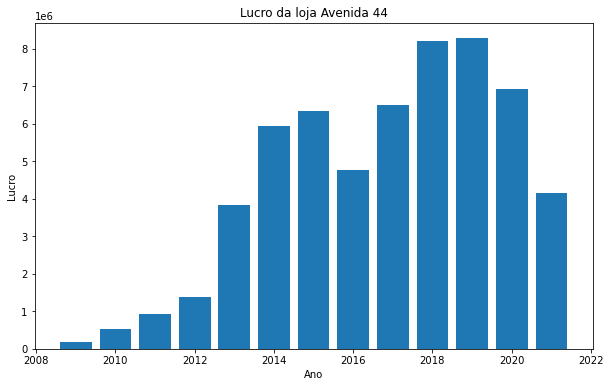

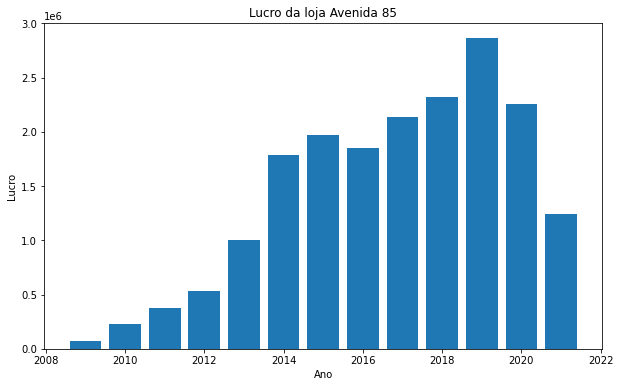

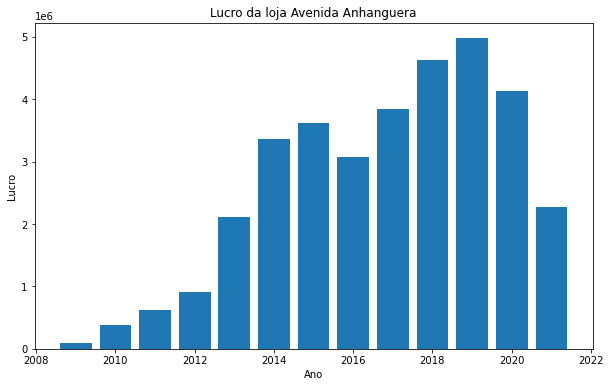

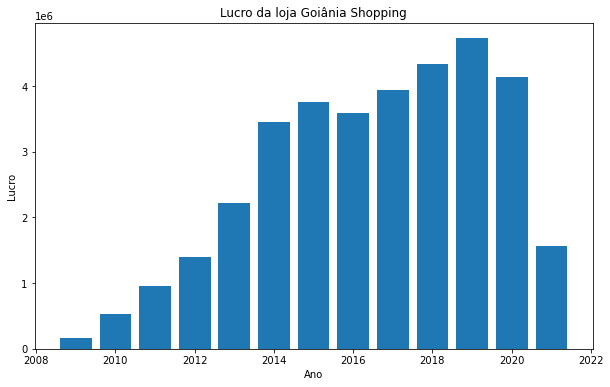

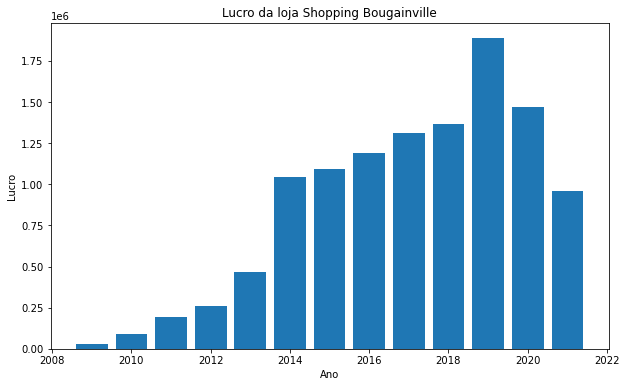

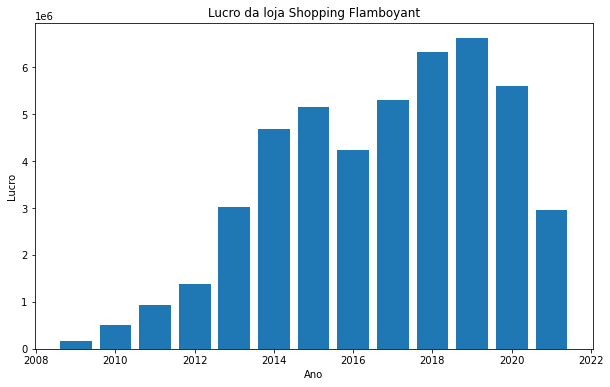

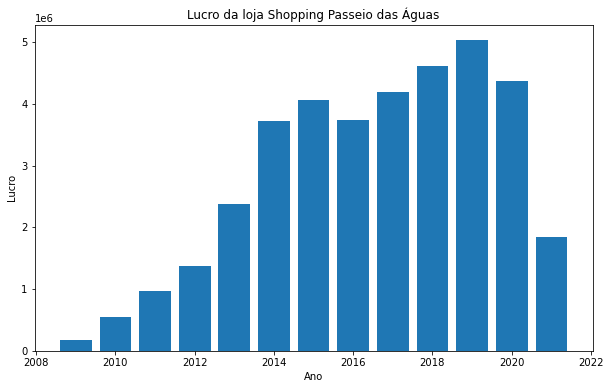

In [89]:
import matplotlib.pyplot as plt

graficos = []

for loja in vendas_por_loja.index:
    # Filtrar loja
    df_loja = venda.loc[venda['Loja']==loja]
    # Separar ano da venda
    df_loja['Ano'] = df_loja['Data'].dt.year
    # Agrupar por ano
    df_ano = df_loja.groupby('Ano').sum()
    # Fazer gráfico de barras
    fig = plt.figure(figsize=(10, 6))
    plt.bar(x=df_ano.index, height=df_ano['Lucro'])
# Personalizar gráfico
    plt.title(f'Lucro da loja {loja}')
    plt.xlabel('Ano')
    plt.ylabel('Lucro')
    # Adicionar à lista
    graficos.append(fig)

# Adicionar à tabela
vendas_por_loja['Gráficos'] = graficos

## Mandar Email desde Python 

> HTML

In [ ]:
corpo = '''
    <h1>Resultados da loja {{ loja }}</h1>

    <p>Resumo dos resultados para a loja <i>{{ loja }}</i> da companhia:</p>

    <ul>
        <li>Faturamento total de <b>{{ faturamento }}</b></li>
        <li><b>{{ quantidade }}</b> peças vendidas</li>
        <li>Ticket médio de <b>{{ ticket_medio }}</b></li>
        <li><b>{{ produto_mais_vendido_1 }}</b> foi o produto mais vendido</li>
        <li><b>{{ produto_mais_vendido_2 }}</b> foi o segundo produto mais vendido</li>
        <li><b>{{ produto_mais_vendido_3 }}</b> foi o terceiro produto mais vendido</li>
    </ul>

    <p>Segue o ranking de vendas de todas as lojas:</p>

    {{ ranking }}

    <p>E os resultados da loja {{ loja }} ao longo do período:</p>

    {{ grafico }}

    <p>Att.</p>
    '''

In [ ]:
from redmail import EmailSender

remetente = 'martinete.avila@gmail.com'
senha = 'gabohola301'

email = EmailSender(host='smtp.gmail.com',
                    port=587,
                    username=remetente,
                    password=senha)

for i, loja in enumerate(vendas_por_loja.index):
    destinatario = emails.sort_values('Loja')['E-mail'][i]
    assunto = f'Resultados da loja {loja}'
    quantidade = vendas_por_loja.sort_values('Loja')['Quantidade'][i]
    lucro = vendas_por_loja.sort_values('Loja')['Lucro'][i]
    ticket_medio = vendas_por_loja.sort_values('Loja')['Ticket Médio'][i]
    produto_1 = vendas_por_loja.sort_values('Loja')['1° Produto Mais Vendido'][i]
    produto_2 = vendas_por_loja.sort_values('Loja')['2° Produto Mais Vendido'][i]
    produto_3 = vendas_por_loja.sort_values('Loja')['3° Produto Mais Vendido'][i]
    grafico = vendas_por_loja.sort_values('Loja')['Gráficos'][i]

    email.send(
        subject=assunto,
        sender=remetente,
        receivers=destinatario,
        html=corpo,
        body_params={
            'loja': loja,
            'faturamento': lucro,
            'quantidade': quantidade,
            'ticket_medio': ticket_medio,
            'produto_mais_vendido_1': produto_1,
            'produto_mais_vendido_2': produto_2,
            'produto_mais_vendido_3': produto_3
        },
        body_images={'grafico': grafico},
        #body_tables={'ranking': ranking}
    )